<a href="https://colab.research.google.com/github/Howlbeeb/ML-Projects/blob/master/nn_LinearLayer_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [2]:
# Device agnostic

device = 'cuda' if torch.cuda.is_available() else 'cpu'

print(f"Device: {device}")

Device: cpu


In [3]:
weight = 0.3
bias = 0.9

start =0
end=1
step=0.02

X=torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

X[:5],y[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.9000],
         [0.9060],
         [0.9120],
         [0.9180],
         [0.9240]]))

In [4]:
train_split = int(0.8 *len(X))

X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]


In [5]:
def plot_predictions(X_test=X_test,X_train=X_train,y_test=y_test,y_train=y_train, predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(X_train,y_train,c='b',s=4,label='Training Data')
  plt.scatter(X_test,y_test,c='g',s=4,label='Testing Data')

  if predictions is not None:
    plt.scatter(X_test,predictions,c='r',s=4,label='Predictions')
  plt.legend(prop={"size":14})


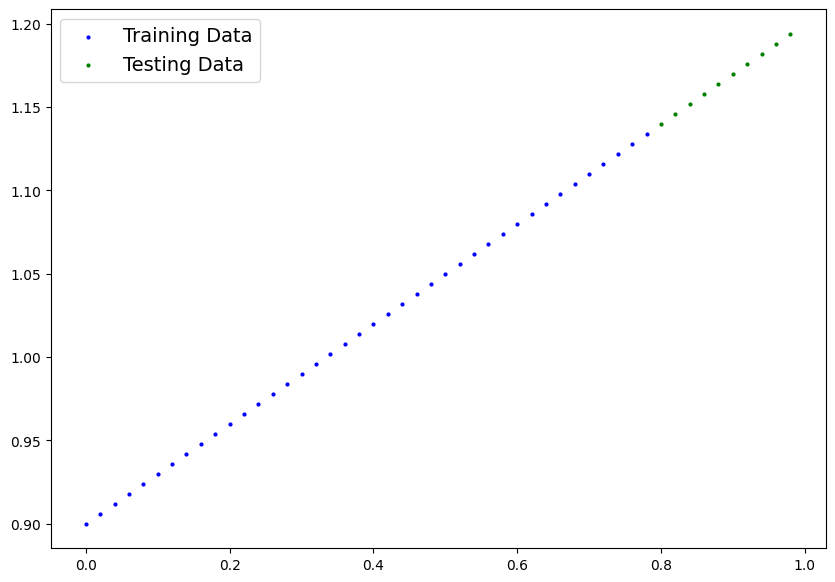

In [6]:
plot_predictions()

In [7]:
class linearmodel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linearlayer = nn.Linear(in_features=1,out_features=1)
  def forward(self,x:torch.tensor)->torch.tensor:
    return self.linearlayer(x)

torch.manual_seed(42)
model = linearmodel()

In [8]:
model.state_dict()

OrderedDict([('linearlayer.weight', tensor([[0.7645]])),
             ('linearlayer.bias', tensor([0.8300]))])

In [9]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.01)

In [10]:
epochs = 300
for epoch in range(epochs):
  y_preds = model(X_train)
  loss=loss_fn(y_preds,y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  # Testing
  model.eval()
  with torch.inference_mode():
    test_pred = model(X_test)
  test_loss = loss_fn(test_pred,y_test)

  if epoch%20==0:
    print(f"Epoch:{epoch}|Loss:{loss},Test Loss:{test_loss}")


Epoch:0|Loss:0.12616769969463348,Test Loss:0.33422544598579407
Epoch:20|Loss:0.08189655840396881,Test Loss:0.21857480704784393
Epoch:40|Loss:0.07218800485134125,Test Loss:0.17499032616615295
Epoch:60|Loss:0.06520797312259674,Test Loss:0.15295077860355377
Epoch:80|Loss:0.05831370875239372,Test Loss:0.1357191950082779
Epoch:100|Loss:0.051440197974443436,Test Loss:0.11986131966114044
Epoch:120|Loss:0.04457508772611618,Test Loss:0.10331656038761139
Epoch:140|Loss:0.03770974278450012,Test Loss:0.08745871484279633
Epoch:160|Loss:0.03083621896803379,Test Loss:0.07160083949565887
Epoch:180|Loss:0.02396780252456665,Test Loss:0.055056132376194
Epoch:200|Loss:0.01710296794772148,Test Loss:0.03919823095202446
Epoch:220|Loss:0.010232259519398212,Test Loss:0.023340392857789993
Epoch:240|Loss:0.003360512899234891,Test Loss:0.006795656867325306
Epoch:260|Loss:0.007012799382209778,Test Loss:0.003249275730922818
Epoch:280|Loss:0.007012799382209778,Test Loss:0.003249275730922818


In [13]:
model.eval()
with torch.inference_mode():
  y_preds = model(X_test)

y_preds

tensor([[1.1496],
        [1.1558],
        [1.1619],
        [1.1680],
        [1.1742],
        [1.1803],
        [1.1864],
        [1.1925],
        [1.1987],
        [1.2048]])

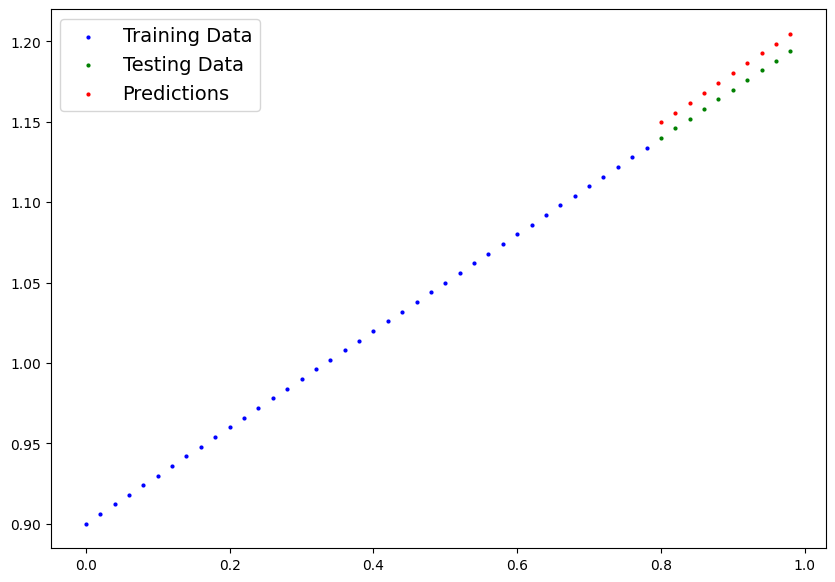

In [12]:
plot_predictions(predictions = y_preds)

In [14]:
from pathlib import Path
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True,exist_ok=True)

MODEL_NAME = 'model.pt'
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

torch.save(obj = model.state_dict(),f=MODEL_SAVE_PATH)

In [15]:
model_1 = linearmodel()
model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<ipython-input-15-b76b34e25d0c>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [16]:
model_1.state_dict(),model.state_dict()

(OrderedDict([('linearlayer.weight', tensor([[0.3064]])),
              ('linearlayer.bias', tensor([0.9045]))]),
 OrderedDict([('linearlayer.weight', tensor([[0.3064]])),
              ('linearlayer.bias', tensor([0.9045]))]))

In [18]:
model_1.eval()

with torch.inference_mode():
  y_preds1 = model_1(X_test)

In [19]:
y_preds==y_preds1

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])